# NDSC Text Classification

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

import spacy
from spacy.lang.en import English
parser = English()

In [60]:
seed = 100

In [61]:
df = pd.read_csv('./data/train_mobile_image.csv')
df.head()

,itemid,title,Category,image_path
0,2346660,apple iphone 4s back glass spare part original...,31,mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg
1,2816338,iphone 4s 64gb white,31,mobile_image/3b9a11608551b11b9330268e0d055e01.jpg
2,2847602,samsung sm b310e piton dual sim,32,mobile_image/1d719e936841a83c165da620f927de68.jpg
3,3116949,samsung caramel gt e1272 dual sim 32 mb putih,32,mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg
4,3794648,garskin sony experia z z1 z2 ultra,33,mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg


In [62]:
# Check for nulls
df.isnull().sum()

itemid        0
title         0
Category      0
image_path    0
dtype: int64

In [63]:
train, val = train_test_split(df, test_size=0.2, random_state=seed)

In [64]:
print('Mobile sample:', train['title'].iloc[0])
print('Mobile category:', train['Category'].iloc[0])
print('Training Data Shape:', train.shape)
print('Validation Data Shape:', val.shape)

Mobile sample: laptop lenovo tinkpad x201 tablet intel corei7 layar putar touchscreen
Mobile category: 35
Training Data Shape: (128264, 4)
Validation Data Shape: (32066, 4)


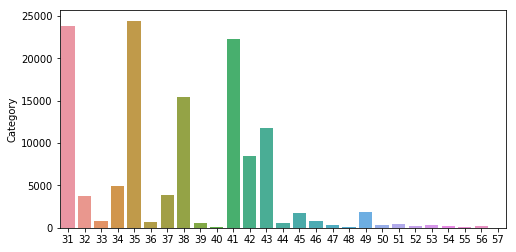

In [65]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['Category'].unique(), y=train['Category'].value_counts())
plt.show()

In [68]:
result = [re.sub(r'\d+', '', line) for line in train['title']]
print(result[:3])
print(train['title'][:3])

['laptop lenovo tinkpad x tablet intel corei layar putar touchscreen', 'iphone s plus gb grey', 'oppo a gb']
99905     laptop lenovo tinkpad x201 tablet intel corei7...
96804                              iphone 6s plus 16gb grey
153056                                         oppo a83 3gb
Name: title, dtype: object


In [69]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(result)

In [116]:
print(X_train_counts.shape)

(128264, 12462)


In [80]:
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aac',
 'aak',
 'aap',
 'aapba',
 'ab',
 'abadi',
 'abal',
 'abang',
 'abc',
 'abca',
 'abis',
 'abisan',
 'abiss',
 'abissss',
 'abk',
 'abl',
 'abn',
 'abpa',
 'abr',
 'abs',
 'absee',
 'absen',
 'absensi',
 'absolute',
 'abtu',
 'abtx',
 'abu',
 'ac',
 'aca',
 'acc',
 'accecoris',
 'accer',
 'accesiories',
 'accesories',
 'accesorios',
 'accesoris',
 'access',
 'accessories',
 'accessoris',
 'accessory',
 'acciories',
 'ace',
 'acej',
 'acer',
 'acerliquidm',
 'acg',
 'ach',
 'achiever',
 'acme',
 'acmic',
 'acompact',
 'aconia',
 'acpl',
 'acro',
 'acrylic',
 'action',
 'actioncamera',
 'actionfit',
 'activ',
 'activate',
 'activated',
 'activation',
 'active',
 'activity',
 'actu',
 'actuator',
 'acu',
 'acw',
 'acxg',
 'acyrilic',
 'ad',
 'ada',
 'adabonus',
 'adalah',
 'adanya',
 'adapt',
 'adapte',
 'adapter',
 'adapterpin',
 'adaptive',
 'adaptor',
 'adaptore',
 'adas',
 'adata',
 'adavan',
 'adb',
 'adcan',
 'add',
 'addha',
 'adge',
 'adh',
 'adha',
 'adheaiv

In [86]:
nlp = spacy.load('en')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter%1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter,len(docs)))
        counter += 1
        doc = re.sub(r'\d+', '', doc)
        #Need to know the difference between tagging, parser and ner
        doc = nlp(doc)
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [14]:
categories = train['Category'].unique()

[35 31 41 38 43 42 34 37 32 49 45 33 46 36 44 39 51 50 53 47 56 52 54 48
 40 55 57]


In [87]:
others_text = [text for text in train[train['Category']==35]['title']]
others_cleanup = cleanup_text(others_text)
others_cleanup = ' '.join(others_cleanup).split()
others_count = Counter(others_cleanup)

In [88]:
len(others_count)

6163

In [89]:
others_common_words = [word[0] for  word in others_count.most_common(20)]
others_common_count = [word[1] for  word in others_count.most_common(20)]

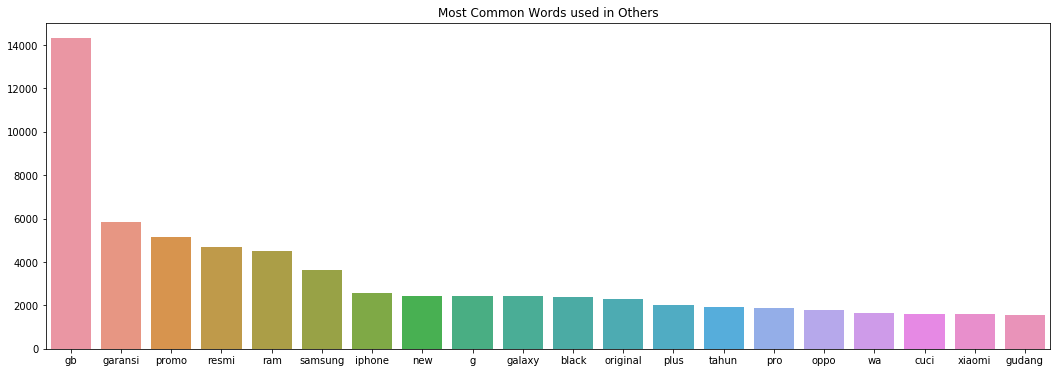

In [90]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=others_common_words, y=others_common_count)
plt.title('Most Common Words used in Others')
plt.show()

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

In [121]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens


In [127]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()

# data
train1 = train['title'].tolist()
labelsTrain1 = train['Category'].tolist()

X_train_counts = vectorizer.fit_transform(train1)
print(X_train_counts.shape)


(128264, 22486)


In [128]:
##############
# pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['title'].tolist()
labelsTrain1 = train['Category'].tolist()

val1 = val['title'].tolist()
labelsVal1 = val['Category'].tolist()

# train
# pipe.fit(train1, labelsTrain1)
clf.fit(train1, labelsTrain1)

# test
preds = clf.predict(val1)
print("accuracy:", accuracy_score(labelsVal1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)

vocab = vectorizer.get_feature_names()
for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

ValueError: could not convert string to float: 'laptop lenovo tinkpad x201 tablet intel corei7 layar putar touchscreen'